In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
pyo.init_notebook_mode(connected=True)

In [3]:
df= pd.read_csv("covid_19_india.csv", parse_dates=['Date'], dayfirst=True)
df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [4]:
df.drop(['ConfirmedIndianNational','ConfirmedForeignNational','Sno'],axis=1,inplace=True)

df.shape

(14690, 6)

In [5]:
df.tail(10)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
14680,2021-05-08,8:00 AM,Puducherry,54375,920,68373
14681,2021-05-08,8:00 AM,Punjab,344779,10144,424647
14682,2021-05-08,8:00 AM,Rajasthan,516306,5346,720799
14683,2021-05-08,8:00 AM,Sikkim,6893,160,9451
14684,2021-05-08,8:00 AM,Tamil Nadu,1173439,15171,1323965
14685,2021-05-08,8:00 AM,Telangana,413225,2666,487199
14686,2021-05-08,8:00 AM,Tripura,34270,405,37208
14687,2021-05-08,8:00 AM,Uttarakhand,158872,3430,229993
14688,2021-05-08,8:00 AM,Uttar Pradesh,1184688,14873,1453679
14689,2021-05-08,8:00 AM,West Bengal,818108,12076,954282


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14690 entries, 0 to 14689
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  14690 non-null  datetime64[ns]
 1   Time                  14690 non-null  object        
 2   State/UnionTerritory  14690 non-null  object        
 3   Cured                 14690 non-null  int64         
 4   Deaths                14690 non-null  int64         
 5   Confirmed             14690 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 688.7+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cured,14690.0,164447.887066,336681.584698,0.0,1472.00,17938.5,196879.75,4265326.0
Deaths,14690.0,2597.966712,6890.026605,0.0,11.00,347.0,1983.75,74413.0
Confirmed,14690.0,181562.172430,374574.773438,0.0,2680.25,23629.0,216702.75,4996758.0


In [8]:
df.isnull().sum()

Date                    0
Time                    0
State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
dtype: int64

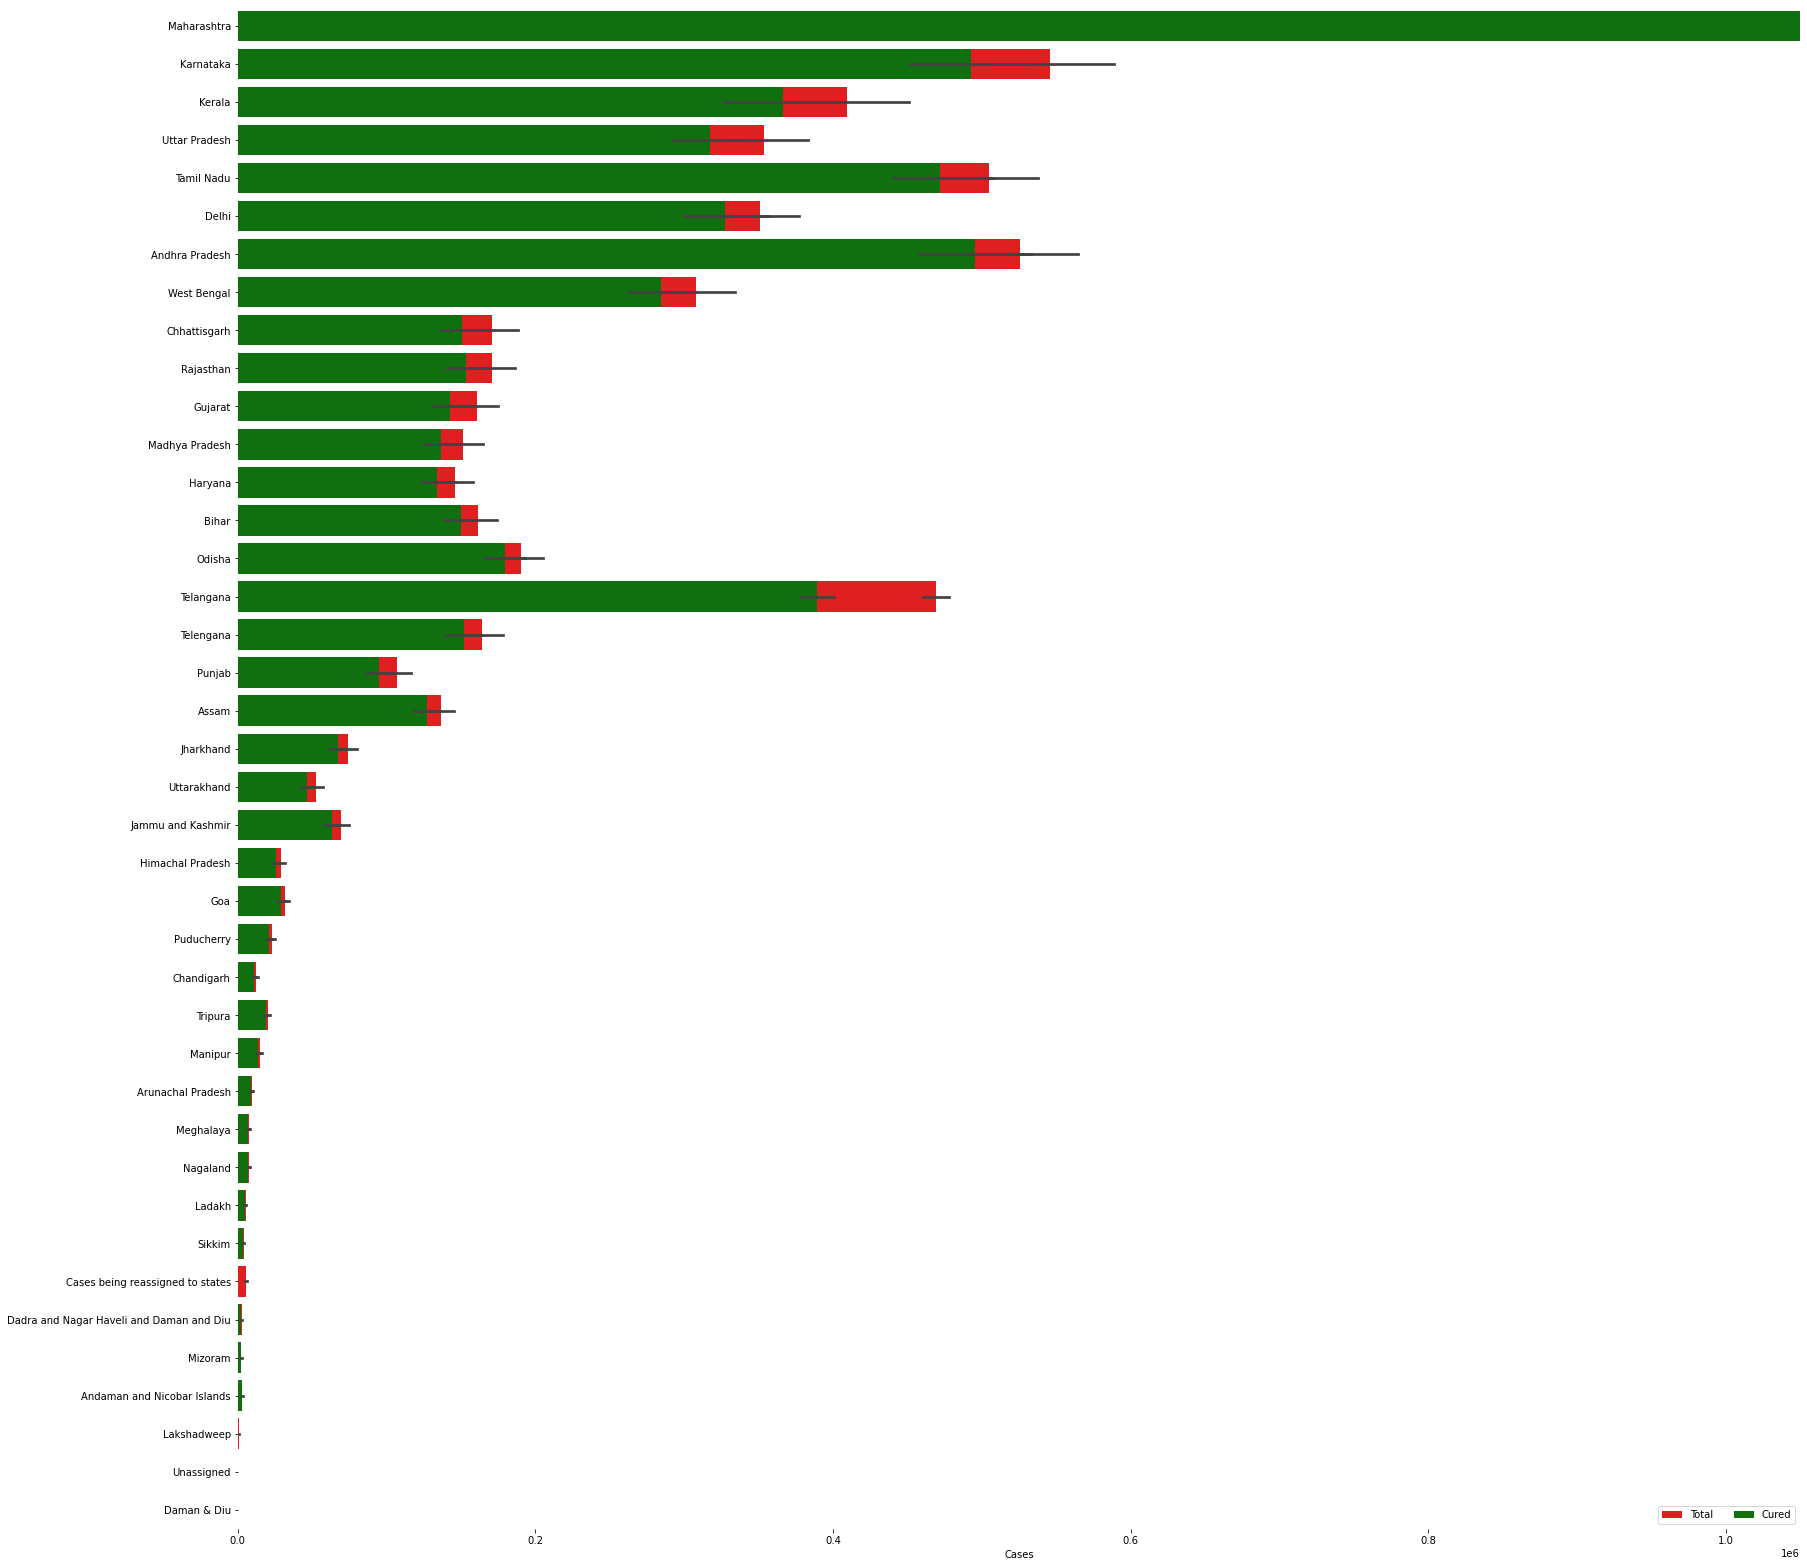

In [9]:
f, ax = plt.subplots(figsize=(28, 28))
data = df[['State/UnionTerritory','Confirmed','Cured','Deaths']]   
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes(palette='dark')
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes(palette='bright')
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1050000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [10]:
confirmed_india=df.groupby('Date')['Confirmed'].sum().reset_index()
cured_india=df.groupby('Date')['Cured'].sum().reset_index()
death_india=df.groupby('Date')['Deaths'].sum().reset_index()

In [11]:
print("The Confirmed Cases are",confirmed_india.Confirmed.max())
print("The Recovered Cases are",cured_india.Cured.max())
print("The Deaths Cases are",death_india.Deaths.max())

The Confirmed Cases are 21892676
The Recovered Cases are 17930960
The Deaths Cases are 238270


In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed_india['Date'], y = confirmed_india['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()
# New COVID-19 cases reported daily in India
import plotly.express as px
fig = px.bar(confirmed_india, x="Date", y="Confirmed", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',xaxis_tickfont_size=14,plot_bgcolor='pink')
fig.show()

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=cured_india["Date"], y=cured_india["Cured"], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative Recoveries)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in India

fig = px.bar(cured_india, x="Date", y="Cured", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Recoveries in India on daily basis',xaxis_tickfont_size=14,plot_bgcolor='gold')
fig.show()

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=death_india['Date'], y = death_india['Deaths'], mode='lines+markers',name='Total Deaths',line=dict(color='Red', width=2)))
fig.update_layout(title_text='Trend of Death Cases in India',plot_bgcolor='rgb(230, 230, 230)')
fig.show()
# New COVID-19 cases reported daily in India
import plotly.express as px
fig = px.bar(death_india, x="Date", y="Deaths", barmode='group', height=500)
fig.update_layout(title_text='Coronavirus Deaths in India on daily basis',plot_bgcolor='lime')
fig.show()

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed_india['Date'], y=confirmed_india['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=death_india['Date'], y=death_india['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=cured_india['Date'], y=cured_india['Cured'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='India COVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()

In [17]:
state_cases = df.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+ state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)

In [18]:
state_cases.head()

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
0,Andaman and Nicobar Islands,6311,72,6030,209,1.14,95.55
1,Andhra Pradesh,1245374,8519,1050160,186695,0.68,84.32
2,Arunachal Pradesh,19802,60,17849,1893,0.30,90.14
3,Assam,283313,1578,246242,35493,0.56,86.92
4,Bihar,567269,3139,449063,115067,0.55,79.16


In [19]:
state_cases['State/UnionTerritory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar',
       'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Telengana', 'Tripura', 'Unassigned', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [20]:
state_wise_cases=state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Oranges',subset=["Active"])\
                        .background_gradient(cmap='RdYlBu',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Accent',subset=["Cure Rate (per 100)"])

In [21]:
state_wise_cases

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
22,Maharashtra,4996758,74413,4265326,657019,1.490000,85.360000
17,Karnataka,1838885,17804,1284420,536661,0.970000,69.850000
18,Kerala,1824856,5682,1416177,402997,0.310000,77.600000
37,Uttar Pradesh,1453679,14873,1184688,254118,1.020000,81.500000
32,Tamil Nadu,1323965,15171,1173439,135355,1.150000,88.630000
10,Delhi,1292867,18739,1183093,91035,1.450000,91.510000
1,Andhra Pradesh,1245374,8519,1050160,186695,0.680000,84.320000
39,West Bengal,954282,12076,818108,124098,1.270000,85.730000
7,Chhattisgarh,830117,10158,688918,131041,1.220000,82.990000
30,Rajasthan,720799,5346,516306,199147,0.740000,71.630000


In [22]:
df['Fatality-Ratio'] = df['Deaths']/df['Confirmed']
df['Fatality-Ratio']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
14685    0.005472
14686    0.010885
14687    0.014913
14688    0.010231
14689    0.012655
Name: Fatality-Ratio, Length: 14690, dtype: float64

In [23]:
fatality_ratio=df.groupby('State/UnionTerritory')['Fatality-Ratio'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=fatality_ratio['State/UnionTerritory'], y = fatality_ratio['Fatality-Ratio'], mode='lines+markers',name='Fatality Ratio',line=dict(color='Red', width=2)))
fig.update_layout(title_text='Fatality-Ratio Among States')
fig.show()

In [24]:
fatality_year=df.groupby('Date')['Fatality-Ratio'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=fatality_year['Date'], y = fatality_year['Fatality-Ratio'], mode='lines+markers',name='Fatality Ratio',line=dict(color='Red', width=2)))
fig.update_layout(title_text='Fatality-Ratio in years')
fig.show()

In [25]:
# Top 10 states with maximum number of COnfirmed Cases
top_10=state_cases.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values(ascending=False).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["State/UnionTerritory","Confirmed Cases"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['State/UnionTerritory'].head(10),top_10['Confirmed'].head(10)],
               fill = dict(color = ['#25FEFD', 'white']),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['State/UnionTerritory'].head(10),
                y=top_10['Confirmed'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='blue'),opacity=0.60)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 States with Highest No. of Cases',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

In [26]:
# Top 10 states with maximum number of Recovery
top_10=state_cases.groupby('State/UnionTerritory')['Cured'].sum().sort_values(ascending=False).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["State/UnionTerritory","Cured Cases"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['State/UnionTerritory'].head(10),top_10['Cured'].head(10)],
               fill = dict(color = ['lime', 'white']),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['State/UnionTerritory'].head(10),
                y=top_10['Cured'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='lime'),opacity=0.60)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 States with Highest Recovery',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

In [27]:
# Top 10 states with maximum number of Deaths
top_10=state_cases.groupby('State/UnionTerritory')['Deaths'].sum().sort_values(ascending=False).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["State/UnionTerritory","Deaths Cases"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['State/UnionTerritory'].head(10),top_10['Deaths'].head(10)],
               fill = dict(color = ['salmon', 'white']),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['State/UnionTerritory'].head(10),
                y=top_10['Deaths'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='darkred'),opacity=0.60)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 States with Highest No. of Cases',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

In [28]:
today = df[df.Date=='2021-05-08']

In [29]:
today.head(15)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Fatality-Ratio
14654,2021-05-08,8:00 AM,Andaman and Nicobar Islands,6030,72,6311,0.011409
14655,2021-05-08,8:00 AM,Andhra Pradesh,1050160,8519,1245374,0.006841
14656,2021-05-08,8:00 AM,Arunachal Pradesh,17849,60,19802,0.003030
14657,2021-05-08,8:00 AM,Assam,246242,1578,283313,0.005570
14658,2021-05-08,8:00 AM,Bihar,449063,3139,567269,0.005534
14659,2021-05-08,8:00 AM,Chandigarh,39388,549,48442,0.011333
14660,2021-05-08,8:00 AM,Chhattisgarh,688918,10158,830117,0.012237
14661,2021-05-08,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,7135,4,8596,0.000465
14662,2021-05-08,8:00 AM,Delhi,1183093,18739,1292867,0.014494
14663,2021-05-08,8:00 AM,Goa,79189,1557,112462,0.013845


In [30]:
max_confirmed=today.sort_values(by='Confirmed', ascending=False)

max_confirmed.head(10)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Fatality-Ratio
14674,2021-05-08,8:00 AM,Maharashtra,4265326,74413,4996758,0.014892
14669,2021-05-08,8:00 AM,Karnataka,1284420,17804,1838885,0.009682
14670,2021-05-08,8:00 AM,Kerala,1416177,5682,1824856,0.003114
14688,2021-05-08,8:00 AM,Uttar Pradesh,1184688,14873,1453679,0.010231
14684,2021-05-08,8:00 AM,Tamil Nadu,1173439,15171,1323965,0.011459
14662,2021-05-08,8:00 AM,Delhi,1183093,18739,1292867,0.014494
14655,2021-05-08,8:00 AM,Andhra Pradesh,1050160,8519,1245374,0.006841
14689,2021-05-08,8:00 AM,West Bengal,818108,12076,954282,0.012655
14660,2021-05-08,8:00 AM,Chhattisgarh,688918,10158,830117,0.012237
14682,2021-05-08,8:00 AM,Rajasthan,516306,5346,720799,0.007417


In [31]:
px.bar(max_confirmed.head(10), x='State/UnionTerritory', y='Confirmed', color = 'Confirmed')

In [32]:
max_deaths=today.sort_values(by='Deaths', ascending='False')
max_deaths.head(10)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Fatality-Ratio
14661,2021-05-08,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,7135,4,8596,0.000465
14672,2021-05-08,8:00 AM,Lakshadweep,2493,9,3629,0.002480
14677,2021-05-08,8:00 AM,Mizoram,5459,17,7382,0.002303
14656,2021-05-08,8:00 AM,Arunachal Pradesh,17849,60,19802,0.003030
14654,2021-05-08,8:00 AM,Andaman and Nicobar Islands,6030,72,6311,0.011409
14678,2021-05-08,8:00 AM,Nagaland,13025,122,15580,0.007831
14671,2021-05-08,8:00 AM,Ladakh,13471,152,15023,0.010118
14683,2021-05-08,8:00 AM,Sikkim,6893,160,9451,0.016929
14676,2021-05-08,8:00 AM,Meghalaya,16262,199,18927,0.010514
14686,2021-05-08,8:00 AM,Tripura,34270,405,37208,0.010885


In [33]:
px.bar(max_deaths.head(10), x='State/UnionTerritory', y='Deaths', color='Deaths')

In [34]:
max_cured_cases=today.sort_values(by='Deaths', ascending=False)
max_cured_cases.head(10)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Fatality-Ratio
14674,2021-05-08,8:00 AM,Maharashtra,4265326,74413,4996758,0.014892
14662,2021-05-08,8:00 AM,Delhi,1183093,18739,1292867,0.014494
14669,2021-05-08,8:00 AM,Karnataka,1284420,17804,1838885,0.009682
14684,2021-05-08,8:00 AM,Tamil Nadu,1173439,15171,1323965,0.011459
14688,2021-05-08,8:00 AM,Uttar Pradesh,1184688,14873,1453679,0.010231
14689,2021-05-08,8:00 AM,West Bengal,818108,12076,954282,0.012655
14660,2021-05-08,8:00 AM,Chhattisgarh,688918,10158,830117,0.012237
14681,2021-05-08,8:00 AM,Punjab,344779,10144,424647,0.023888
14655,2021-05-08,8:00 AM,Andhra Pradesh,1050160,8519,1245374,0.006841
14664,2021-05-08,8:00 AM,Gujarat,503497,8154,658036,0.012391


In [35]:
px.bar(max_cured_cases.head(10), x='State/UnionTerritory', y='Cured',  color='Cured')

In [36]:
maha = df[df['State/UnionTerritory']=='Maharashtra']
maha.head(10)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Fatality-Ratio
76,2020-03-09,6:00 PM,Maharashtra,0,0,2,0.000000
91,2020-03-10,6:00 PM,Maharashtra,0,0,5,0.000000
97,2020-03-11,6:00 PM,Maharashtra,0,0,2,0.000000
120,2020-03-12,6:00 PM,Maharashtra,0,0,11,0.000000
133,2020-03-13,6:00 PM,Maharashtra,0,0,14,0.000000
146,2020-03-14,6:00 PM,Maharashtra,0,0,14,0.000000
153,2020-03-15,6:00 PM,Maharashtra,0,0,32,0.000000
167,2020-03-16,6:00 PM,Maharashtra,0,0,32,0.000000
182,2020-03-17,6:00 PM,Maharashtra,0,1,39,0.025641
197,2020-03-18,6:00 PM,Maharashtra,0,1,42,0.023810


In [37]:
maha.tail(10)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Fatality-Ratio
14350,2021-04-29,8:00 AM,Maharashtra,3730729,67214,4473394,0.015025
14386,2021-04-30,8:00 AM,Maharashtra,3799266,67985,4539553,0.014976
14422,2021-05-01,8:00 AM,Maharashtra,3868976,68813,4602472,0.014951
14458,2021-05-02,8:00 AM,Maharashtra,3930302,69615,4665754,0.014920
14494,2021-05-03,8:00 AM,Maharashtra,3981658,70284,4722401,0.014883
14530,2021-05-04,8:00 AM,Maharashtra,4041158,70851,4771022,0.014850
14566,2021-05-05,8:00 AM,Maharashtra,4107092,71742,4822902,0.014875
14602,2021-05-06,8:00 AM,Maharashtra,4164098,72662,4880542,0.014888
14638,2021-05-07,8:00 AM,Maharashtra,4227940,73515,4942736,0.014873
14674,2021-05-08,8:00 AM,Maharashtra,4265326,74413,4996758,0.014892


In [38]:
maha.shape

(426, 7)

In [39]:
'''fig = go.Figure()
fig.add_trace(go.Scatter(x=maha['Date'], y = maha['Confirmed'], mode='lines+markers',line=dict(color='Red', width=2)))
fig.update_layout(title_text='Confirmed cases trend in Maharashtra')
fig.show()'''
px.line(maha, x='Date', y='Confirmed', title='Confirmed cases trend in Maharashtra', color='State/UnionTerritory')

In [40]:
'''fig = go.Figure()
fig.add_trace(go.Scatter(x=maha['Date'], y = maha['Deaths'], mode='lines+markers',line=dict(color='Green', width=2)))
fig.update_layout(title_text='Confirmed Deaths trend in Maharashtra')
fig.show()'''
px.line(maha, x='Date', y='Deaths', color='State/UnionTerritory', title='Death cases trend in Maharashtra')

In [41]:
kerala = df[df['State/UnionTerritory']=='Kerala']
kerala.head(10)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Fatality-Ratio
0,2020-01-30,6:00 PM,Kerala,0,0,1,0.0
1,2020-01-31,6:00 PM,Kerala,0,0,1,0.0
2,2020-02-01,6:00 PM,Kerala,0,0,2,0.0
3,2020-02-02,6:00 PM,Kerala,0,0,3,0.0
4,2020-02-03,6:00 PM,Kerala,0,0,3,0.0
5,2020-02-04,6:00 PM,Kerala,0,0,3,0.0
6,2020-02-05,6:00 PM,Kerala,0,0,3,0.0
7,2020-02-06,6:00 PM,Kerala,0,0,3,0.0
8,2020-02-07,6:00 PM,Kerala,0,0,3,0.0
9,2020-02-08,6:00 PM,Kerala,0,0,3,0.0


In [42]:
kerala.tail(10)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Fatality-Ratio
14346,2021-04-29,8:00 AM,Kerala,1223185,5211,1495377,0.003485
14382,2021-04-30,8:00 AM,Kerala,1244301,5259,1533984,0.003428
14418,2021-05-01,8:00 AM,Kerala,1261801,5308,1571183,0.003378
14454,2021-05-02,8:00 AM,Kerala,1277294,5356,1606819,0.003333
14490,2021-05-03,8:00 AM,Kerala,1293590,5405,1638778,0.003298
14526,2021-05-04,8:00 AM,Kerala,1313109,5450,1664789,0.003274
14562,2021-05-05,8:00 AM,Kerala,1339257,5507,1701979,0.003236
14598,2021-05-06,8:00 AM,Kerala,1362363,5565,1743932,0.003191
14634,2021-05-07,8:00 AM,Kerala,1389515,5628,1786396,0.003150
14670,2021-05-08,8:00 AM,Kerala,1416177,5682,1824856,0.003114


In [43]:
kerala.shape

(465, 7)

In [44]:
'''fig = go.Figure()
fig.add_trace(go.Scatter(x=kerala['Date'], y = kerala['Confirmed'], mode='lines+markers',line=dict(color='Purple', width=2)))
fig.update_layout(title_text='Confirmed cases trend in Kerala')
fig.show()'''
px.line(kerala, x='Date', y='Confirmed', color='State/UnionTerritory', title='Confirmed cases trend in Kerala')

In [45]:
'''fig = go.Figure()
fig.add_trace(go.Scatter(x=kerala['Date'], y = kerala['Deaths'], mode='lines+markers', line=dict(color='Blue', width=2)))
fig.update_layout(title_text='Confirmed deathss trend in kerala', )
fig.show()'''
px.line(kerala, x='Date', y='Deaths', color='State/UnionTerritory', title='Death cases trend in Kerala')

In [46]:
#tests
tests = pd.read_csv('StatewiseTestingDetails.csv')
tests.head(10)

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
5,2020-05-19,Andaman and Nicobar Islands,6965.0,NaN,33.0
6,2020-05-20,Andaman and Nicobar Islands,7082.0,NaN,33.0
7,2020-05-21,Andaman and Nicobar Islands,7167.0,NaN,33.0
8,2020-05-22,Andaman and Nicobar Islands,7263.0,NaN,33.0
9,2020-05-23,Andaman and Nicobar Islands,7327.0,NaN,33.0


In [47]:
tests.tail(10)

,Date,State,TotalSamples,Negative,Positive
12978,2021-04-27,West Bengal,10270645.0,NaN,NaN
12979,2021-04-28,West Bengal,10325581.0,NaN,NaN
12980,2021-04-29,West Bengal,10379305.0,NaN,NaN
12981,2021-04-30,West Bengal,10432553.0,NaN,NaN
12982,2021-05-01,West Bengal,10488850.0,NaN,NaN
12983,2021-05-02,West Bengal,10545059.0,NaN,NaN
12984,2021-05-03,West Bengal,10600346.0,NaN,NaN
12985,2021-05-04,West Bengal,10658094.0,NaN,NaN
12986,2021-05-05,West Bengal,10717613.0,NaN,NaN
12987,2021-05-06,West Bengal,10777718.0,NaN,NaN


In [48]:
# States with Total Sample collections
sample=tests.groupby('State')['TotalSamples'].sum().sort_values(ascending=False).reset_index()

sample.head()

,State,TotalSamples
0,Uttar Pradesh,6.042367e+09
1,Bihar,4.259541e+09
2,Tamil Nadu,3.683393e+09
3,Karnataka,3.577881e+09
4,Maharashtra,3.494829e+09


In [49]:
samples=sample[0:10]

In [50]:
px.bar(samples,x='State',y='TotalSamples', color='TotalSamples')

In [51]:
positives=tests.groupby('State')['Positive'].sum().sort_values(ascending=False).reset_index()

In [52]:
positivity=positives[0:10]

In [53]:
px.bar(positivity,x='State',y='Positive', color='Positive')

In [54]:
mahar = tests[tests['State']=='Maharashtra']
mahar.shape

(392, 5)

In [55]:
sample1=mahar.groupby('Date')['TotalSamples'].sum().sort_values(ascending=False).reset_index()
sample1.head(10)

,Date,TotalSamples
0,2021-05-06,28661668.0
1,2021-05-05,28384582.0
2,2021-05-04,28105382.0
3,2021-05-03,27864426.0
4,2021-05-02,27652758.0
5,2021-05-01,27395288.0
6,2021-04-30,27106282.0
7,2021-04-29,26816075.0
8,2021-04-28,26527862.0
9,2021-04-27,26254737.0


In [56]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sample1['Date'], y = sample1['TotalSamples'], mode='lines+markers',line=dict(color='Yellow', width=2)))
fig.update_layout(title_text='Sample Collected per day in Maharashtra')
fig.show()

In [57]:
kerala0 = tests[tests['State']=='Kerala']
kerala0.shape

(401, 5)

In [58]:
sample2=kerala0.groupby('Date')['TotalSamples'].sum().sort_values(ascending=False).reset_index()
sample2.head(10)

,Date,TotalSamples
0,2021-05-06,16616470.0
1,2021-05-05,16460838.0
2,2021-05-04,16297517.0
3,2021-05-03,16154929.0
4,2021-05-02,16058633.0
5,2021-05-01,15945998.0
6,2021-04-30,15799524.0
7,2021-04-29,15650037.0
8,2021-04-28,15492489.0
9,2021-04-27,15354299.0


In [59]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sample2['Date'], y = sample2['TotalSamples'], mode='lines+markers',line=dict(color='Yellow', width=2)))
fig.update_layout(title_text='Sample Collected per day in Kerala')
fig.show()

In [60]:
#vaccination
df_vaccine=pd.read_csv('covid_vaccine_statewise.csv')

df_vaccine.head()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [61]:
df_vaccine.columns

Index(['Updated On', 'State', 'Total Individuals Vaccinated',
       'Total Sessions Conducted', 'Total Sites ', 'First Dose Administered',
       'Second Dose Administered', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Covaxin Administered', 'Total CoviShield Administered', 'AEFI',
       '18-30 years (Age)', '30-45 years (Age)', '45-60 years (Age)',
       '60+ years (Age)', 'Total Doses Administered'],
      dtype='object')

In [62]:
male = df_vaccine["Male(Individuals Vaccinated)"].sum() 
female = df_vaccine["Female(Individuals Vaccinated)"].sum()  
trans = df_vaccine["Transgender(Individuals Vaccinated)"].sum()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19")

In [63]:
Covaxin = df_vaccine["Total Covaxin Administered"].sum() 
Covishield = df_vaccine["Total CoviShield Administered"].sum()  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxin,Covishield],title="Covaxin and Covishield Vaccination")

In [64]:
Doses = df_vaccine["Total Doses Administered"].sum() 
Vaccinated = df_vaccine["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [65]:
mahara=df_vaccine[df_vaccine['State']=='Maharashtra']
kerala2=df_vaccine[df_vaccine['State']=='Kerala']

In [66]:
Doses = mahara["Total Doses Administered"].sum() 
Vaccinated = mahara["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [67]:
px.bar(mahara, x='Updated On',y='Total Individuals Vaccinated', title='Total people Vaccinated in Maharashtra')

In [68]:
Doses = kerala2["Total Doses Administered"].sum() 
Vaccinated = kerala2["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [69]:
px.bar(kerala2,x='Updated On',y='Total Individuals Vaccinated', title='Total people Vaccinated in Kerala')

In [70]:
#Future Prediction
confirmed_india.columns = ['ds','y']
confirmed_india['ds'] = pd.to_datetime(confirmed_india['ds'])
confirmed_india.head()

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3


In [71]:
confirmed_india.shape

(465, 2)

In [72]:
from fbprophet import Prophet

In [73]:
m = Prophet()
m.fit(confirmed_india)
future = m.make_future_dataframe(periods=21)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
481,2021-05-25
482,2021-05-26
483,2021-05-27
484,2021-05-28
485,2021-05-29


In [74]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
481,2021-05-25,1.793574e+07,1.692276e+07,1.893272e+07,1.783127e+07,1.802249e+07,-15820.974840,-15820.974840,-15820.974840,-15820.974840,-15820.974840,-15820.974840,0.0,0.0,0.0,1.791992e+07
482,2021-05-26,1.800689e+07,1.698166e+07,1.897277e+07,1.789146e+07,1.810231e+07,-5316.321538,-5316.321538,-5316.321538,-5316.321538,-5316.321538,-5316.321538,0.0,0.0,0.0,1.800158e+07
483,2021-05-27,1.807805e+07,1.696459e+07,1.909110e+07,1.795026e+07,1.818274e+07,10522.898372,10522.898372,10522.898372,10522.898372,10522.898372,10522.898372,0.0,0.0,0.0,1.808857e+07
484,2021-05-28,1.814920e+07,1.711744e+07,1.922860e+07,1.800444e+07,1.826434e+07,23450.183628,23450.183628,23450.183628,23450.183628,23450.183628,23450.183628,0.0,0.0,0.0,1.817265e+07
485,2021-05-29,1.822036e+07,1.729527e+07,1.931689e+07,1.805773e+07,1.834618e+07,37540.934527,37540.934527,37540.934527,37540.934527,37540.934527,37540.934527,0.0,0.0,0.0,1.825790e+07


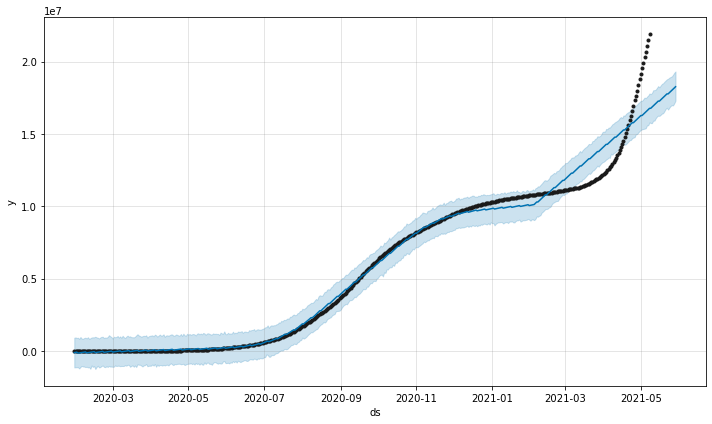

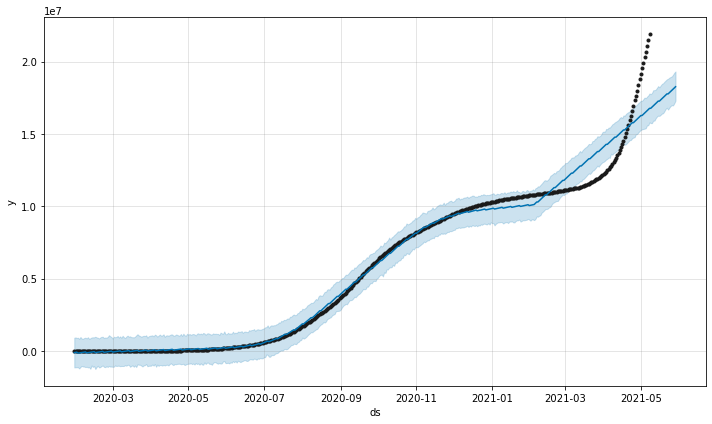

In [75]:
m.plot(forecast)

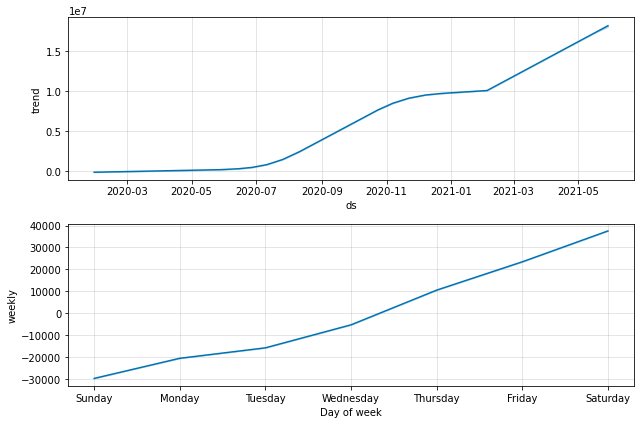

In [76]:
confirmed_forecast_plot =m.plot_components(forecast)

In [77]:
death_india.columns = ['ds','y']
death_india['ds'] = pd.to_datetime(death_india['ds'])
death_india.head()

,ds,y
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0


In [78]:
death_india.shape

(465, 2)

In [79]:
model = Prophet()
model.fit(death_india)
future = model.make_future_dataframe(periods=14)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
474,2021-05-18
475,2021-05-19
476,2021-05-20
477,2021-05-21
478,2021-05-22


In [80]:
prediction = model.predict(future)
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
474,2021-05-18,199161.835393,191642.717770,207017.712139,198783.655626,199416.497684,-165.512536,-165.512536,-165.512536,-165.512536,-165.512536,-165.512536,0.0,0.0,0.0,198996.322857
475,2021-05-19,199648.739387,192280.082246,207433.916334,199174.935058,199987.034729,-39.314270,-39.314270,-39.314270,-39.314270,-39.314270,-39.314270,0.0,0.0,0.0,199609.425117
476,2021-05-20,200135.643380,192335.551358,207882.996684,199556.876387,200561.634202,97.742603,97.742603,97.742603,97.742603,97.742603,97.742603,0.0,0.0,0.0,200233.385983
477,2021-05-21,200622.547374,193179.054665,208842.683206,199936.474311,201132.714026,214.436992,214.436992,214.436992,214.436992,214.436992,214.436992,0.0,0.0,0.0,200836.984366
478,2021-05-22,201109.451368,194241.662776,209246.212015,200315.594863,201739.204876,344.702558,344.702558,344.702558,344.702558,344.702558,344.702558,0.0,0.0,0.0,201454.153925


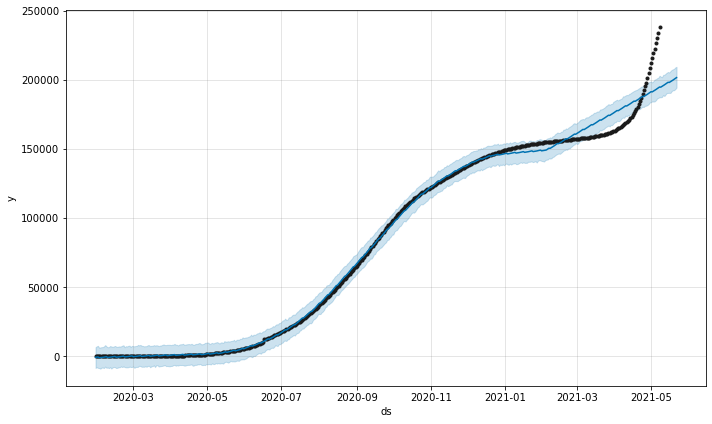

In [81]:
death_forecast_plot = model.plot(prediction)

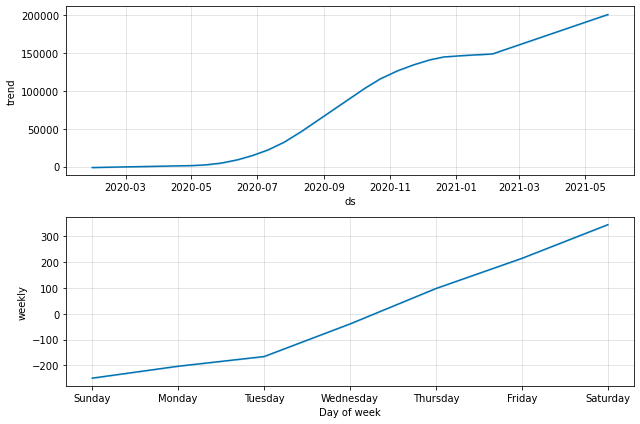

In [82]:
deaths_forecast_plot = model.plot_components(prediction)